<a href="https://colab.research.google.com/github/ufrpe-ensino/ia-aulas/blob/master/00-intro/03_Visualizacao-Estatisticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização de Dados e Estatísticas Descritivas em Python

Nesta aula, vamos aprender como explorar, descrever e visualizar dados utilizando Python, com foco em estatísticas descritivas e gráficos. Usaremos o dataset de imóveis do Recife.

## Objetivos
- Compreender o papel da visualização na análise de dados
- Calcular estatísticas descritivas básicas
- Gerar gráficos para explorar dados

## Importando bibliotecas

In [ ]:
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando o conjunto de dados
Vamos utilizar um conjunto de dados de imóveis do Recife disponível online.

In [ ]:
houses = pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/intro_cd/gh-pages/data/recife.csv", encoding = "ISO-8859-1")
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart


## Estatísticas Descritivas
Vamos calcular algumas estatísticas básicas para entender o conjunto de dados.

In [ ]:
houses.shape  # Dimensões do data frame

(1744, 13)

In [ ]:
houses.dtypes  # Tipos das colunas

price          int64
latitude     float64
longitude    float64
bedrooms     float64
area         float64
pkspaces     float64
bathrooms    float64
ensuites     float64
suburb        object
district      object
city          object
state         object
type          object
dtype: object

### Estatísticas gerais

In [ ]:
houses.describe()  # Estatísticas gerais

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites
count,1.744000e+03,1744.000000,1744.000000,1737.000000,1721.000000,1646.000000,1538.000000,764.000000
mean,4.650508e+05,-8.059572,-34.903232,2.998273,120.782493,1.788578,2.676853,1.429319
std,5.927109e+05,0.036093,0.015105,1.057940,95.680958,1.030367,1.281568,0.872759
min,0.000000e+00,-8.159529,-34.971088,1.000000,25.000000,0.000000,0.000000,1.000000
25%,2.300000e+03,-8.064218,-34.910381,2.000000,70.000000,1.000000,2.000000,1.000000
50%,3.500000e+05,-8.045020,-34.902294,3.000000,94.000000,2.000000,3.000000,1.000000
75%,6.300000e+05,-8.033553,-34.894247,4.000000,139.000000,2.000000,3.000000,2.000000
max,7.500000e+06,-7.969322,-34.874427,15.000000,1682.000000,15.000000,8.000000,6.000000


In [ ]:
# Média, mediana, moda, variância e desvio padrão do preço
print('Média:', houses['price'].mean())
print('Mediana:', houses['price'].median())
print('Moda:', houses['price'].mode()[0])
print('Variância:', houses['price'].var())
print('Desvio padrão:', houses['price'].std())

Média: 465050.814793578
Mediana: 350000.0
Moda: 350000
Variância: 351306173214.82
Desvio padrão: 592710.8681429926


### Estatísticas da área

In [ ]:
houses['area'].describe()

count    1721.000000
mean      120.782493
std        95.680958
min        25.000000
25%        70.000000
50%        94.000000
75%       139.000000
max      1682.000000
Name: area, dtype: float64

## Correlações

In [ ]:
houses.columns

Index(['price', 'latitude', 'longitude', 'bedrooms', 'area', 'pkspaces',
       'bathrooms', 'ensuites', 'suburb', 'district', 'city', 'state', 'type',
       'operation'],
      dtype='object')

## Correlação de Pearson

A correlação de Pearson é uma medida estatística que avalia a força e a direção da relação linear entre duas variáveis quantitativas. Seu coeficiente, conhecido como **r de Pearson**, varia de -1 a 1:

- **r = 1**: correlação linear positiva perfeita (quando uma variável aumenta, a outra também aumenta proporcionalmente).
- **r = -1**: correlação linear negativa perfeita (quando uma variável aumenta, a outra diminui proporcionalmente).
- **r = 0**: ausência de correlação linear.

Valores próximos de 1 ou -1 indicam forte correlação, enquanto valores próximos de 0 indicam correlação fraca ou inexistente. É importante lembrar que a correlação de Pearson só captura relações lineares e não implica causalidade entre as variáveis.

No contexto da análise de dados de imóveis, a correlação de Pearson pode ser usada, por exemplo, para investigar se existe relação entre o preço dos imóveis e características como área, número de quartos ou banheiros.

In [ ]:
pearson_corr = houses.loc[houses.operation=='sell',
           ['price', 'bedrooms', 'area',
            'bathrooms', 'ensuites']].corr(method='pearson')
pearson_corr

,price,bedrooms,area,bathrooms,ensuites
price,1.000000,0.451947,0.653239,0.519452,0.679669
bedrooms,0.451947,1.000000,0.566756,0.656487,0.562102
area,0.653239,0.566756,1.000000,0.597956,0.669119
bathrooms,0.519452,0.656487,0.597956,1.000000,0.850007
ensuites,0.679669,0.562102,0.669119,0.850007,1.000000


<Axes: >

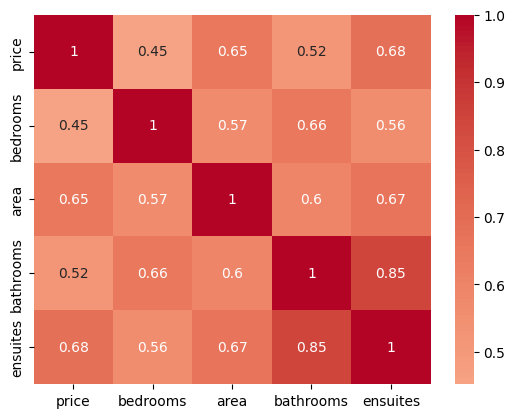

In [ ]:
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)

### Correlação de Spearman

A correlação de Spearman é uma medida estatística que avalia a relação monotônica entre duas variáveis quantitativas ou ordinais. Diferente da correlação de Pearson, que mede apenas relações lineares, a correlação de Spearman é baseada nos postos (ranks) dos dados e pode capturar relações não-lineares, desde que sejam monotônicas (ou seja, que uma variável aumente ou diminua consistentemente em relação à outra).

O coeficiente de Spearman varia de -1 a 1:
- **1** indica uma correlação monotônica positiva perfeita.
- **-1** indica uma correlação monotônica negativa perfeita.
- **0** indica ausência de correlação monotônica.

A correlação de Spearman é especialmente útil quando os dados apresentam outliers ou não seguem uma distribuição normal, sendo uma alternativa robusta à correlação de Pearson em muitos cenários de análise de dados. No contexto dos imóveis, pode ser usada para investigar relações entre preço, área, número de quartos, banheiros, entre outros, mesmo quando essas relações não são estritamente lineares.

<Axes: >

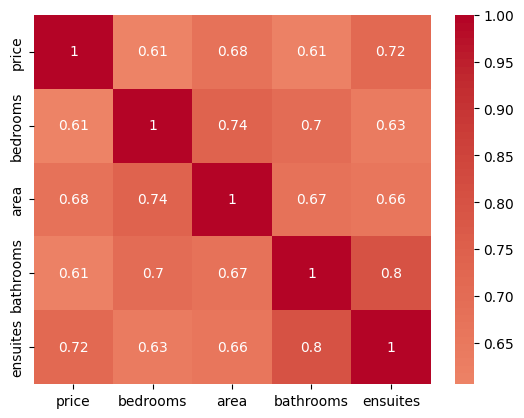

In [ ]:
spearman_corr = houses.loc[houses.operation=='sell',
           ['price', 'bedrooms', 'area',
            'bathrooms', 'ensuites']].corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)

## Visualização de Dados
### Histograma do preço dos imóveis

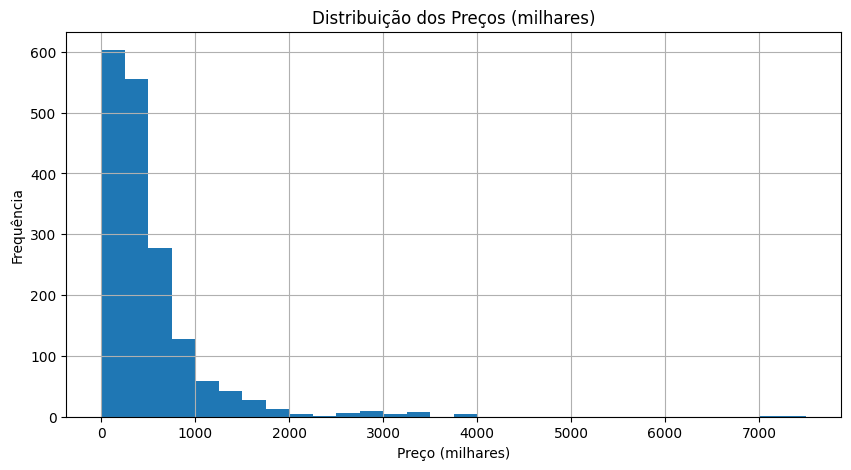

In [ ]:
(houses['price']/1000).hist(bins=30, figsize=(10,5))
plt.title('Distribuição dos Preços (milhares)')
plt.xlabel('Preço (milhares)')
plt.ylabel('Frequência')
plt.show()

### Definindo se um imóvel está à venda ou para locação a partir do preço

In [ ]:
# Adicionando coluna para aluguel e venda
houses['operation'] = 'sell'
houses.loc[(houses['price'] > 100) & (houses['price'] < 30000),'operation'] = 'rent'
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,rent
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,sell
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,sell
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,sell
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,sell


### Boxplot da área dos imóveis

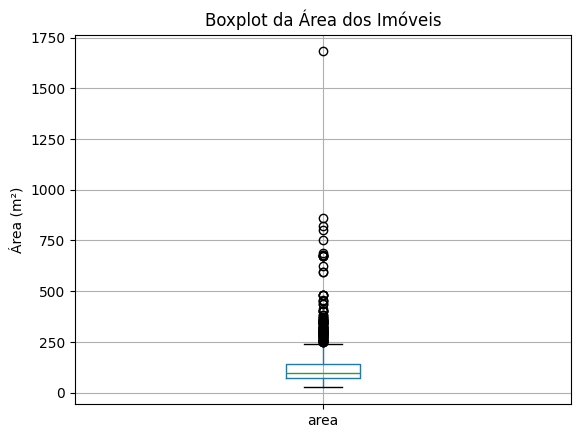

In [ ]:
houses.boxplot(column=['area'])
plt.title('Boxplot da Área dos Imóveis')
plt.ylabel('Área (m²)')
plt.show()

### Gráfico de barras: quantidade de imóveis por tipo

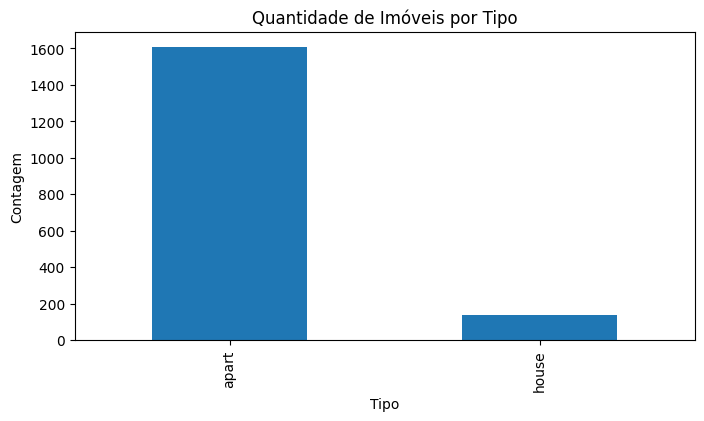

In [ ]:
houses['type'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title('Quantidade de Imóveis por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.show()

### Gráfico de dispersão: área vs preço

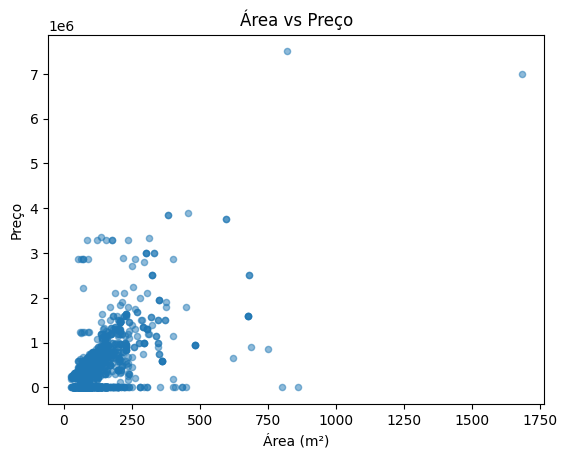

In [ ]:
houses.plot.scatter(x='area', y='price', alpha=0.5)
plt.title('Área vs Preço')
plt.xlabel('Área (m²)')
plt.ylabel('Preço')
plt.show()

### Visualizando dados com geolocalização

In [ ]:
!pip install folium

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)


In [ ]:
import folium

# Centro aproximado de Recife
mapa = folium.Map(location=[-8.05, -34.9], zoom_start=12)

for _, row in houses.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue' if row['operation'] == 'sell' else 'green',
        fill=True,
        fill_opacity=0.6,
        popup=f"Preço: R${row['price']}\nTipo: {row['type']}"
    ).add_to(mapa)

mapa

### Heat map dos preços de venda

In [ ]:
from folium.plugins import HeatMap

# Filtra imóveis para aluguel com latitude, longitude e preço válidos
rent_houses = houses[(houses['operation'] == 'sell') &
                     houses['latitude'].notnull() &
                     houses['longitude'].notnull() &
                     houses['price'].notnull()]

# Cria o mapa centralizado em Recife
heatmap_map = folium.Map(location=[-8.05, -34.9], zoom_start=12)

# Adiciona o HeatMap
HeatMap(
    data=rent_houses[['latitude', 'longitude', 'price']].values,
    radius=10,
    max_zoom=13
).add_to(heatmap_map)

heatmap_map

## Exercícios

1. Calcule o preço médio do metro quadrado de venda e aluguel para Recife.
2. Plote um histograma da coluna `area`.
3. Plote um boxplot do preço para apartamentos e casas separadamente.
4. Plote um gráfico de dispersão entre `bedrooms` e `area`.
5. Encontre os bairros com maior e menor valor de venda e aluguel do metro quadrado.

In [ ]:
# 1. Preço médio do metro quadrado de venda e aluguel

# 2. Histograma da área

# 3. Boxplot do preço para apartamentos e casas

# 4. Scatter plot entre bedrooms e area

# 5. Bairros com maior e menor valor de venda do metro quadrado